In [106]:
import numpy as np
import numpy.linalg as la
from mpl_toolkits.mplot3d import axes3d
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

import warnings
warnings.filterwarnings(action="ignore")

### Question 1:

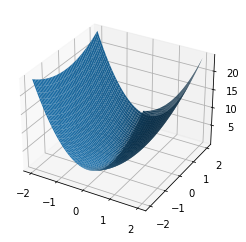

In [107]:
def f(x):
    return 5*x[0]**2 + x[1]**2
def df(x):
    return np.array([10*x[0],2*x[1]])


fig = pt.figure()
ax = fig.gca(projection="3d")
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

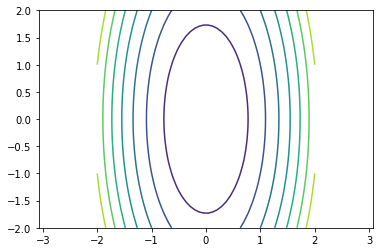

In [108]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

In [109]:
guesses = [np.array([0., 2.0])]

In [113]:
x = guesses[-1]
s = -df(x)
def f1d(alpha):
    return f(x + alpha*s)

In [114]:
alpha_opt = sopt.golden(f1d)
print(alpha_opt)
next_guess = x + alpha_opt * s
guesses.append(next_guess)
print(next_guess)

0.5000000001311388
[0.00000000e+00 1.37579058e-19]


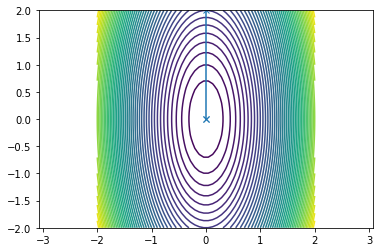

In [115]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

#### Derivative using sympy

In [48]:
#import sympy
from sympy import *
x, y = symbols('x y')
expr = x**2 + 2 * y + y**3
print("Expression : {}".format(expr))
# Use sympy.Derivative() method
expr_diff = Derivative(expr, x)
print("Derivative of expression with respect to x : {}".format(expr_diff))
print("Value of the derivative : {}".format(expr_diff.doit()))

Expression : x**2 + y**3 + 2*y
Derivative of expression with respect to x : Derivative(x**2 + y**3 + 2*y, x)
Value of the derivative : 2*x


In [50]:
# import sympy
from sympy import *
x, y = symbols('x y')
expr = 5*(x)**2+y**2
print("Expression : {} ".format(expr))
# Use sympy.Derivative() method
expr_diff_x = Derivative(expr, x)
expr_diff_y = Derivative(expr, y)
print("Derivative of expression with respect to x : {}".format(expr_diff_x))
print("Value of the derivative : {} ".format(expr_diff_x.doit()))
print("Derivative of expression with respect to y : {}".format(expr_diff_y))
print("Value of the derivative : {} ".format(expr_diff_y.doit()))

Expression : 5*x**2 + y**2 
Derivative of expression with respect to x : Derivative(5*x**2 + y**2, x)
Value of the derivative : 10*x 
Derivative of expression with respect to y : Derivative(5*x**2 + y**2, y)
Value of the derivative : 2*y 


### Newtons method

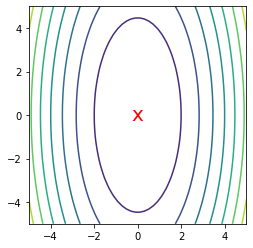

In [51]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return 5*x[0]**2 + x[1]**2

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y) # meshgrid
XY = np.vstack([X.ravel(), Y.ravel()]) # 2D to 1D vertically
Z = func(XY).reshape(50,50) # back to 2D
plt.contour(X, Y, Z) # plot contour
plt.text(0, 0, 'x', va='center', ha='center',color='red', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')#equal axis
plt.show()

In [52]:
def func_grad(x):
    grad = np.zeros_like(x)
    grad[0] = 10*x[0]
    grad[1] = 2*x[1]
    return grad
def func_hess(x):
    n = np.size(x) # we assume this a n x 1 or 1 x n vec
    hess = np.zeros((n,n),'d')
    hess[0,0] = 10.
    hess[1,0] = 0.
    hess[0,1] = 0.
    hess[1,1] = 2.
    return hess


#Capture intermediate states of optimization
def reporter(x):
    global xs
    xs.append(x)

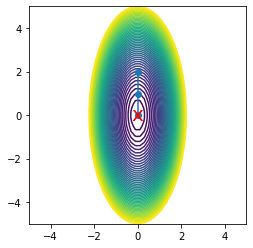

[[0.   2.  ]
 [0.   0.99]
 [0.   0.  ]]


In [57]:
x0 = np.array([0.,2.0])
xs = [x0]

opt.minimize(func,x0,jac=func_grad,callback=reporter)
#opt.minimize(func,x0,jac=func_grad,hess=func_hess,callback=reporter)

xs = np.array(xs)
plt.figure()
plt.contour(X, Y, Z, np.linspace(0,25,50))
plt.text(0, 0, 'x', va='center', ha='center',
color='red', fontsize=20)
plt.plot(xs[:, 0], xs[:, 1], '-o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
print(xs)

### Question 2

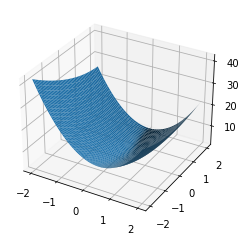

In [10]:
def f(x):
    return ((10*x[0]**2+x[1]**2)/2)+5*np.log(1+np.exp(-x[0]- x[1]))
def df(x):
    return np.array([10*x[0]-5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1])),x[1]-5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))])


fig = pt.figure()
ax = fig.gca(projection="3d")
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

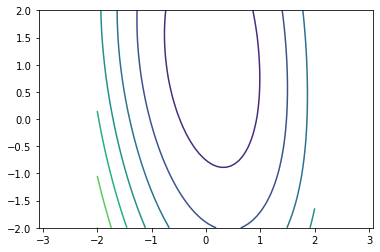

In [12]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

#### Derivative using sympy

In [59]:
from sympy import *
x, y = symbols('x y')
expr = ((10*(x)**2 + y**2)/2) + (5*log(1+exp(-x-y)))
print("Expression : {} ".format(expr))
# Use sympy.Derivative() method
expr_diff_x = Derivative(expr, x)
expr_diff_y = Derivative(expr, y)
print("Derivative of expression with respect to x : {}".format(expr_diff_x))
print("Value of the derivative : {} ".format(expr_diff_x.doit()))
print("Derivative of expression with respect to y : {}".format(expr_diff_y))
print("Value of the derivative : {} ".format(expr_diff_y.doit()))

Expression : 5*x**2 + y**2/2 + 5*log(exp(-x - y) + 1) 
Derivative of expression with respect to x : Derivative(5*x**2 + y**2/2 + 5*log(exp(-x - y) + 1), x)
Value of the derivative : 10*x - 5*exp(-x - y)/(exp(-x - y) + 1) 
Derivative of expression with respect to y : Derivative(5*x**2 + y**2/2 + 5*log(exp(-x - y) + 1), y)
Value of the derivative : y - 5*exp(-x - y)/(exp(-x - y) + 1) 


In [71]:
guesses = [np.array([0.4, 2.0])]

In [89]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
print(alpha_opt)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

0.37070997238377834
[0.11309834 1.12634255]


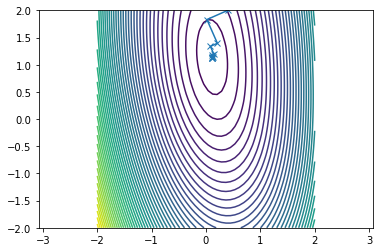

In [90]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

### Newtons method

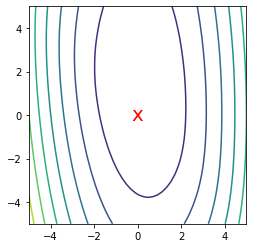

In [91]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return  ((10*x[0]**2+x[1]**2)/2)+5*np.log(1+np.exp(-x[0]- x[1]))

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y) # meshgrid
XY = np.vstack([X.ravel(), Y.ravel()]) # 2D to 1D vertically
Z = func(XY).reshape(50,50) # back to 2D
plt.contour(X, Y, Z) # plot contour
plt.text(0, 0, 'x', va='center', ha='center',color='red', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')#equal axis
plt.show()

In [92]:
def func_grad(x):
    grad = np.zeros_like(x)
    grad[0] = 10*x[0]-5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))
    grad[1] = x[1]-5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))
    return grad

def func_hess(x):
    n = np.size(x) # we assume this a n x 1 or 1 x n vec
    hess = np.zeros((n,n),'d')
    hess[0,0] = 10 + 5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))**2
    hess[1,0] = 5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))**2
    hess[0,1] = 5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))**2
    hess[1,1] = 1 + 5*np.exp(-x[0]- x[1])/(1+np.exp(-x[0]- x[1]))**2
    return hess

D:\Softwares\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


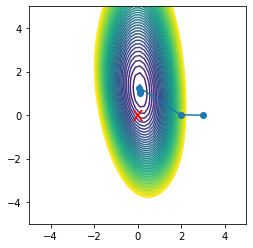

[[3.         0.        ]
 [1.99003205 0.00804671]
 [0.08348801 1.2619649 ]
 [0.10792673 1.03175137]
 [0.11425993 1.1262317 ]
 [0.11231616 1.12484003]
 [0.11246834 1.12466585]
 [0.11246719 1.12467191]]


In [94]:
#Capture intermediate states of optimization
def reporter(x):
    global xs
    xs.append(x)

    
x0 = np.array([3,0])
xs = [x0]
#opt.minimize(func,x0,jac=func_grad,callback=reporter)
opt.minimize(func,x0,jac=func_grad,hess=func_hess,callback=reporter)
xs = np.array(xs)
plt.figure()
plt.contour(X, Y, Z, np.linspace(0,25,50))
plt.text(0, 0, 'x', va='center', ha='center',
color='red', fontsize=20)
plt.plot(xs[:, 0], xs[:, 1], '-o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
print(xs)

### Question 3:

In [95]:
def f(x):
    return (x[0] + 10*x[1])**2 + 5*(x[2] - x[3])**2 + (x[1] - 2*x[2])**4 + 10*(x[0]-x[3])**4
def df(x):
    return np.array([2*x[0] + 20*x[1] + 40*(x[0] - x[3])**3  , 20*x[0] + 200*x[1] + 4*(x[1] - 2*x[2])**3 , 10*x[2] - 10*x[3] - 8*(x[1] - 2*x[2])**3 , -10*x[2] + 10*x[3] - 40*(x[0] - x[3])**3 ])

#### Derivative using sympy

In [97]:
from sympy import *
a,b,c,d = symbols('a b c d')
expr = (a + 10*b)**2 + 5*(c - d)**2 + (b - 2*c)**4 + 10*(a-d)**4
print("Expression : {} ".format(expr))
# Use sympy.Derivative() method
expr_diff_a = Derivative(expr, a)
expr_diff_b = Derivative(expr, b)
expr_diff_c = Derivative(expr, c)
expr_diff_d = Derivative(expr, d)
print("-"*90)
print("Derivative of expression with respect to a : {}".format(expr_diff_a))
print("Value of the derivative with respect to a: {} ".format(expr_diff_a.doit()))
print("-"*90)
print("Derivative of expression with respect to b : {}".format(expr_diff_b))
print("Value of the derivative with respect to b: {} ".format(expr_diff_b.doit()))
print("-"*90)
print("Derivative of expression with respect to c : {}".format(expr_diff_c))
print("Value of the derivative with respect to c: {} ".format(expr_diff_c.doit()))
print("-"*90)
print("Derivative of expression with respect to d : {}".format(expr_diff_d))
print("Value of the derivative with respect to d: {} ".format(expr_diff_d.doit()))

Expression : (a + 10*b)**2 + 10*(a - d)**4 + (b - 2*c)**4 + 5*(c - d)**2 
------------------------------------------------------------------------------------------
Derivative of expression with respect to a : Derivative((a + 10*b)**2 + 10*(a - d)**4 + (b - 2*c)**4 + 5*(c - d)**2, a)
Value of the derivative with respect to a: 2*a + 20*b + 40*(a - d)**3 
------------------------------------------------------------------------------------------
Derivative of expression with respect to b : Derivative((a + 10*b)**2 + 10*(a - d)**4 + (b - 2*c)**4 + 5*(c - d)**2, b)
Value of the derivative with respect to b: 20*a + 200*b + 4*(b - 2*c)**3 
------------------------------------------------------------------------------------------
Derivative of expression with respect to c : Derivative((a + 10*b)**2 + 10*(a - d)**4 + (b - 2*c)**4 + 5*(c - d)**2, c)
Value of the derivative with respect to c: 10*c - 10*d - 8*(b - 2*c)**3 
---------------------------------------------------------------------------

In [98]:
def func_grad(x):
    grad = np.zeros_like(x)
    grad[0] = 2*x[0] + 20*x[1] + 40*(x[0] - x[3])**3 
    grad[1] = 20*x[0] + 200*x[1] + 4*(x[1] - 2*x[2])**3
    grad[2] = 10*x[2] - 10*x[3] - 8*(x[1] - 2*x[2])**3
    grad[3] = -10*x[2] + 10*x[3] - 40*(x[0] - x[3])**3
    return grad

def func_hess(x):
    n = np.size(x) # we assume this a n x 1 or 1 x n vec
    hess = np.zeros((n,n),'d')
    hess[0,0] = 2 + 120*(x[0] - x[3])
    hess[0,1] = 20
    hess[0,2] = 0
    hess[0,3] = -120*(x[0] - x[3])
    hess[1,0] = 20
    hess[1,1] = 200 + 12*(x[1] - 2*x[2])**2
    hess[1,2] = -24*(x[1] - 2*x[2])**2
    hess[1,3] = 0
    hess[2,0] = 0
    hess[2,1] = -24*(x[1] - 2*x[2])**2
    hess[2,2] = 10 + 48*(x[1] - 2*x[2])**2
    hess[2,3] = -10
    hess[3,0] = -120*(x[0] - x[3])**2
    hess[3,1] = 0
    hess[3,2] = -10
    hess[3,3] = 10 + 120*(x[0] - x[3])**2 
    return hess

In [105]:
#Capture intermediate states of optimization
def reporter(x):
    global xs
    xs.append(x)

    
x0 = np.array([3,-1,0,1])
xs = [x0]
#opt.minimize(func,x0,jac=func_grad,callback=reporter)
opt.minimize(func,x0,jac=func_grad,hess=func_hess,callback=reporter)
xs = np.array(xs)
print(xs)

[[ 3.         -1.          0.          1.        ]
 [ 2.32633884 -0.68298298  0.00440301  1.68246719]
 [ 2.34034558 -0.29841608  0.06527299  1.63462395]
 [ 2.21058563 -0.28266166  0.31033801  1.51696588]
 [ 1.65366491 -0.22754385  0.13952547  0.97003768]
 [ 0.74642051 -0.07623309  0.21192403  0.13887087]
 [ 0.6768584  -0.07015695  0.17365285  0.11309033]
 [ 0.55035973 -0.05609874  0.11245279  0.08673201]
 [ 0.39483287 -0.03954964  0.05285348  0.05197094]
 [ 0.28046477 -0.02805763  0.0175811   0.01766253]
 [ 0.18765135 -0.01876824 -0.0102545  -0.0102911 ]]
